In [1]:
import os, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

from numpy import set_printoptions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}/feature1"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42


In [3]:
x_train=pd.read_excel(f'{save_dir}/x_train.xlsx')
y_train=pd.read_excel(f'{save_dir}/y_train.xlsx')
x_test=pd.read_excel(f'{save_dir}/x_test.xlsx')
y_test=pd.read_excel(f'{save_dir}/y_test.xlsx')
class_weights_dict=dict(np.load(f'{exps_dir}/feature1/class_weights_dict.npz',allow_pickle=True))['class_weights_dict']
class_weights_dict = {key: value for key, value in class_weights_dict.item().items()}
class_weights_dict

{0: 0.6325301204819277, 1: 2.3863636363636362}

In [4]:
feature_selection=dict(np.load(f'{exps_dir}/feature1/feature_model_selection.npz',allow_pickle=True))['feature_model_selection']
feature_selection = {key: value for key, value in feature_selection.item().items()}
feature_selection

{'LR': ['day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'month_policy_bind_date',
  'policy_annual_premium',
  'property_claim',
  'property_damage',
  'total_claim_amount',
  'vehicle_claim'],
 'LDA': ['day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_sex',
  'month_policy_bind_date',
  'policy_annual_premium',
  'property_claim',
  'property_damage',
  'total_claim_amount',
  'vehicle_claim'],
 'DTC': ['auto_model',
  'day_incident_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'insured_occupation',
  'month_policy_bind_date',
  'policy_annual_premium',
  'total_claim_amount',
  'year_policy_bind_date'],
 'RD': ['auto_model',
  'day_incident_date',
  'day_policy_bind_date',
  'incident_severity',
  'injury_claim',
  'insured_hobbies',
  'policy_annual_premium',
  'property_claim',
  'total_claim_amount',
  'vehicle_claim'],
 'KNC': ['age',
  'insured_sex',
  'insured_occupation',
  'incident_severity',
  

### Kết luận:
- Nhóm xây dựng một mạng Netual network ứng dụng kỹ thuật trong học sâu như callbacks, đánh trọng số,.... Nhưng không khắc phục được tình trạng (imbalanced variable).

# 6. Đánh giá và lựa chọn mô hình học máy có giám sát

In [5]:
def check_model(name,model,X,Y,names,results,scoring):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results=cross_val_score(model,X[feature_selection[name]],Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=scoring.title()+" %s: %.3f%% (%.3f%%)"%(name,cv_results.mean()*100,cv_results.std()*100)
    print(msg)       
    return 

Accuracy LR: 76.000% (2.439%)
Accuracy LDA: 83.238% (2.527%)
Accuracy DTC: 80.000% (2.409%)
Accuracy RD: 80.000% (1.998%)
Accuracy KNC: 79.048% (2.694%)
Accuracy NB: 79.238% (4.059%)
Accuracy SVM: 73.905% (1.961%)
Accuracy NN: 82.286% (3.332%)
Accuracy BG: 80.762% (2.584%)


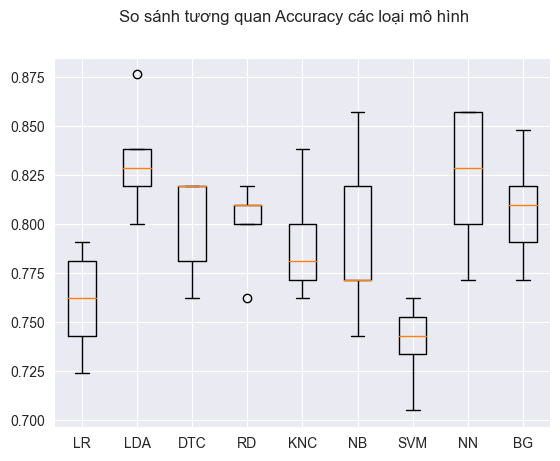

Precision LR: 46.135% (4.839%)
Precision LDA: 65.151% (12.479%)
Precision DTC: 56.282% (10.452%)
Precision RD: 53.766% (7.153%)
Precision KNC: 0.000% (0.000%)
Precision NB: 50.962% (8.272%)
Precision SVM: 43.436% (2.494%)
Precision NN: 63.198% (13.888%)
Precision BG: 55.196% (12.355%)


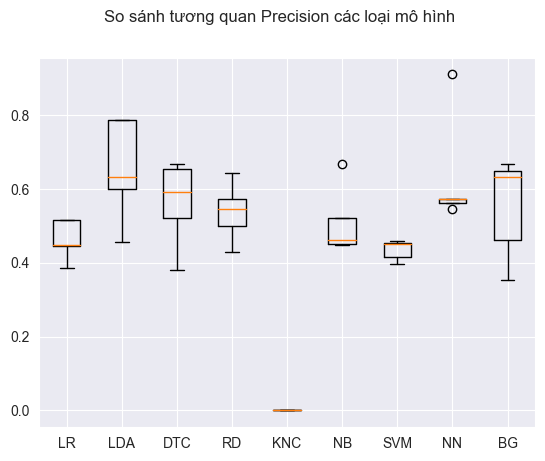

Recall LR: 79.643% (11.699%)
Recall LDA: 40.376% (10.717%)
Recall DTC: 58.649% (10.806%)
Recall RD: 31.230% (6.350%)
Recall KNC: 0.000% (0.000%)
Recall NB: 62.478% (6.976%)
Recall SVM: 81.514% (12.078%)
Recall NN: 44.158% (11.342%)
Recall BG: 40.567% (8.605%)


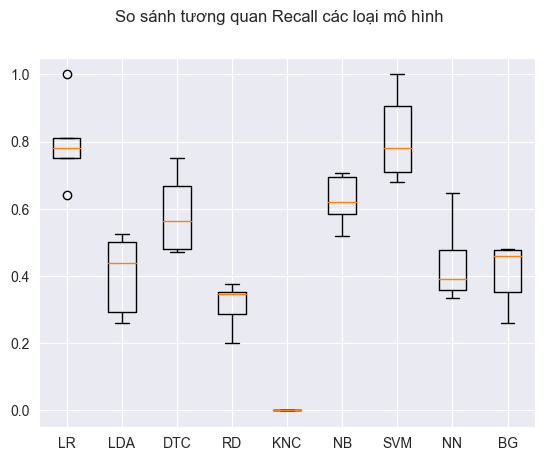

F1 LR: 57.782% (3.504%)
F1 LDA: 49.432% (11.213%)
F1 DTC: 55.321% (10.767%)
F1 RD: 39.079% (6.310%)
F1 KNC: 0.000% (0.000%)
F1 NB: 55.762% (6.383%)
F1 SVM: 56.255% (2.648%)
F1 NN: 51.549% (7.960%)
F1 BG: 46.477% (9.969%)


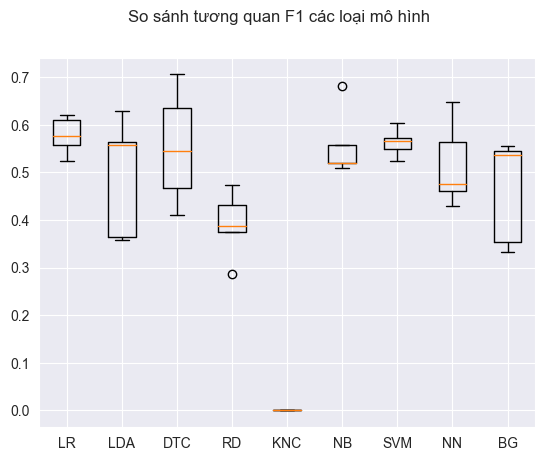

In [6]:
num_folds=5
seed=7
models=[]

models.append(('KNC',KNeighborsClassifier(n_neighbors=100)))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(class_weight=class_weights_dict)))
models.append(('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)))
models.append(('GD',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)))
#models.append(('Naive',MultinomialNB()))


RandomForestClassifier(n_estimators=500, 
                                max_depth=10, 
                                min_samples_split=400, 
                                random_state=12, 
                                class_weight=class_weights_dict,
                                )

results=[]
names=[]
scorings=['accuracy','precision','recall','f1']
#check_model('LR',LogisticRegression(class_weight=class_weights_dict),X_logistic,Y,names,results,scorings)
#check_model('LDA',LinearDiscriminantAnalysis(),X_linear,Y,names,results,scorings)
#check_model('CART',DecisionTreeClassifier(class_weight=class_weights_dict),X_decision,Y,names,results,scorings)
#check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),X_forest,Y,names,results,scorings)



for scoring in scorings:
    check_model('LR',LogisticRegression(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('LDA',LinearDiscriminantAnalysis(),x_train,y_train,names,results,scoring)
    check_model('DTC',DecisionTreeClassifier(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('RD',RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('KNC',KNeighborsClassifier(n_neighbors=100),x_train,y_train,names,results,scoring)
    check_model('NB',GaussianNB(),x_train,y_train,names,results,scoring)
    check_model('SVM',SVC(class_weight=class_weights_dict),x_train,y_train,names,results,scoring)
    check_model('NN',MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),x_train,y_train,names,results,scoring)
    check_model('BG',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),x_train,y_train,names,results,scoring)
    fig=plt.figure()
    fig.suptitle(f'So sánh tương quan {scoring.title()} các loại mô hình')
    ax=fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    results=[]
    names=[]


### Nhận xét dựa theo kết quả tập Train :
Mô hình LDA: Mô hình này có độ chính xác cao nhất (83.238%) so với các mô hình khác. Tuy nhiên, chỉ số Recall của nó khá thấp (40.376%), điều này có nghĩa là mô hình này có thể bỏ sót một số trường hợp gian lận. Precision của nó cũng khá cao (65.151%), cho thấy mô hình này ít khi phân loại sai một hồ sơ không gian lận thành gian lận.

Mô hình NN: Mô hình này có độ chính xác thứ hai cao nhất (82.286%) và Precision cao (63.198%). Tuy nhiên, giống như mô hình LDA, Recall của nó cũng khá thấp (44.158%).

Mô hình BG: Mô hình này có độ chính xác khá cao (80.762%) và Precision tương đối (55.196%). Tuy nhiên, Recall của nó cũng khá thấp (40.567%).

Nhìn chung từ kết quả trên ta có thể thấy LDA là mô hình tốt nhất , do có độ chính xác và Precision cao. Tuy nhiên,cần cải thiện chỉ số Recall cho mô hình vì việc bỏ sót các trường hợp gian lận có thể gây ra những hậu quả nghiêm trọng .

In [7]:
evaluate_result={}

### LogisticRegression

In [8]:
supervied_features=x_train[feature_selection['LR']]
supervied_target=y_train
model=LogisticRegression(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

LogisticRegression(class_weight={0: 0.6325301204819277, 1: 2.3863636363636362})

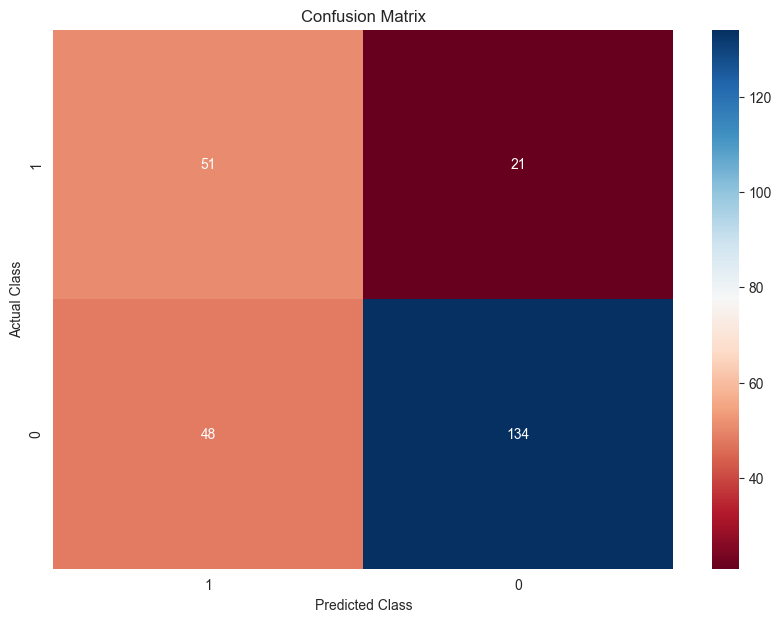

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       182
           1       0.52      0.71      0.60        72

    accuracy                           0.73       254
   macro avg       0.69      0.72      0.70       254
weighted avg       0.77      0.73      0.74       254



In [9]:
predictions = model.predict(x_test[feature_selection['LR']])
conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LogisticRegression']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Gaussian NB

In [10]:
supervied_features=x_train[feature_selection['GNB']]
supervied_target=y_train
model=GaussianNB()
model.fit(supervied_features,supervied_target)

GaussianNB()

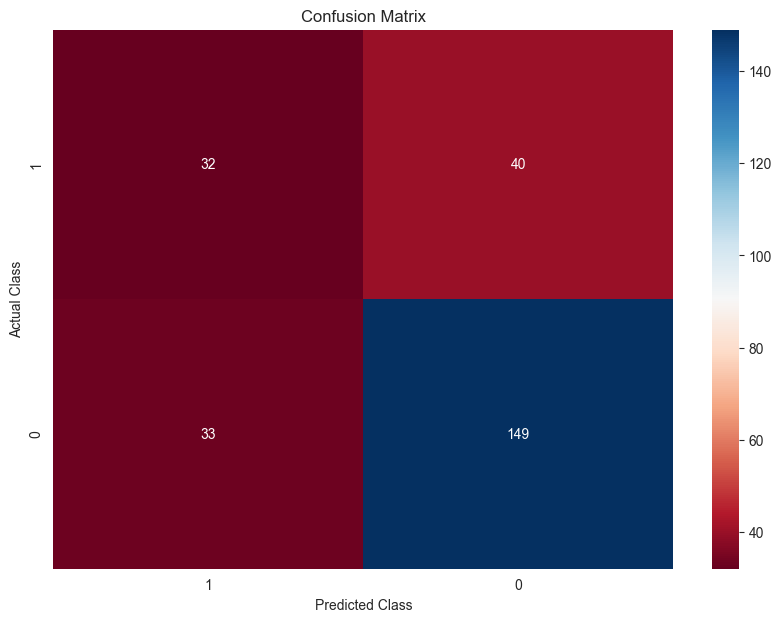

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       182
           1       0.49      0.44      0.47        72

    accuracy                           0.71       254
   macro avg       0.64      0.63      0.64       254
weighted avg       0.70      0.71      0.71       254



In [11]:
predictions = model.predict(x_test[feature_selection['GNB']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['GaussianNB']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### MultinomialNB


In [12]:
supervied_features=x_train[feature_selection['NB']]
supervied_target=y_train
model=MultinomialNB()
model.fit(supervied_features,supervied_target)

MultinomialNB()

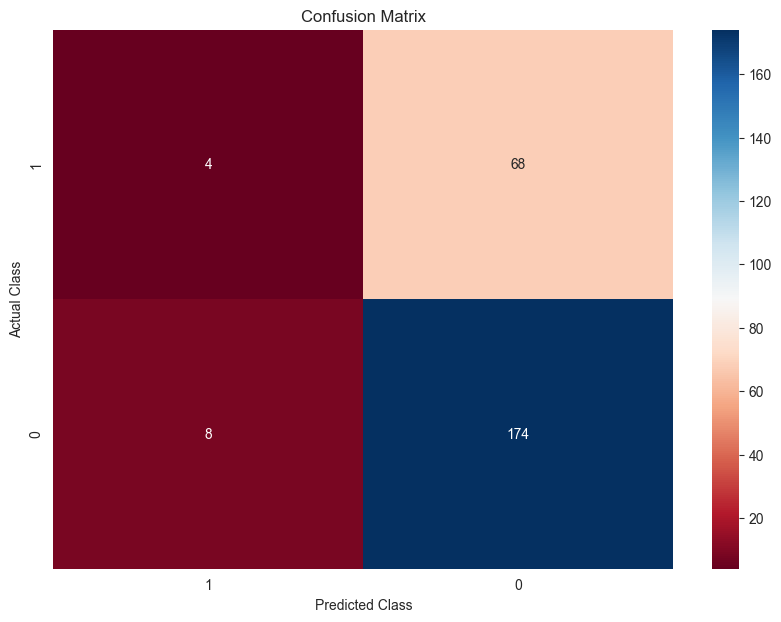

              precision    recall  f1-score   support

           0       0.72      0.96      0.82       182
           1       0.33      0.06      0.10        72

    accuracy                           0.70       254
   macro avg       0.53      0.51      0.46       254
weighted avg       0.61      0.70      0.62       254



In [13]:
predictions = model.predict(x_test[feature_selection['NB']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['MultinomialNB']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### MLPClassifier

In [14]:
supervied_features=x_train[feature_selection['NN']]
supervied_target=y_train
model=MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(supervied_features,supervied_target)

MLPClassifier(max_iter=500)

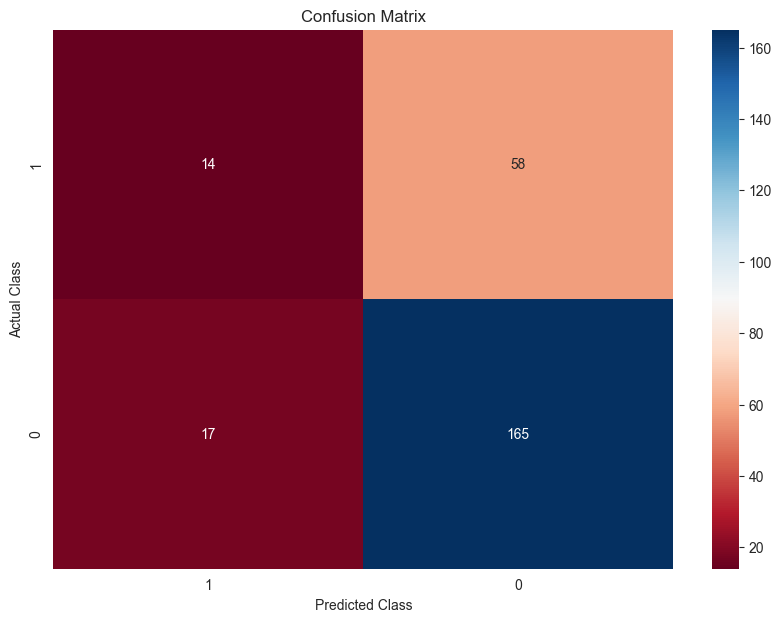

              precision    recall  f1-score   support

           0       0.74      0.91      0.81       182
           1       0.45      0.19      0.27        72

    accuracy                           0.70       254
   macro avg       0.60      0.55      0.54       254
weighted avg       0.66      0.70      0.66       254



In [15]:
predictions = model.predict(x_test[feature_selection['NN']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['MLPClassifier']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### GradientBoostingClassifier

In [16]:
supervied_features=x_train[feature_selection['BG']]
supervied_target=y_train
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(supervied_features,supervied_target)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

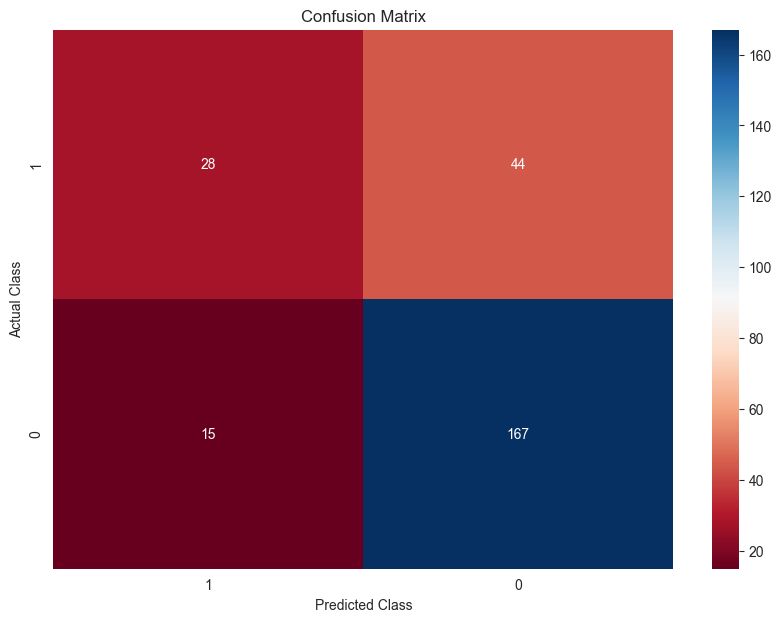

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       182
           1       0.65      0.39      0.49        72

    accuracy                           0.77       254
   macro avg       0.72      0.65      0.67       254
weighted avg       0.75      0.77      0.75       254



In [17]:
predictions = model.predict(x_test[feature_selection['BG']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['GradientBoostingClassifier']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### Kết luận:
- Nhìn vào đồ thị có thể thấy giá trị trung vị của mô hình Random Forest là cao nhất theo scoring="Accuracy"
- Mô hình LDA là mô hình ít bị biến động nhất và mô hình GD là một mô hình cân đối khi vừa có tỉ lệ ít biến động vừa có khoảng trung vị cao tương đối

### Mô hình SVM
      -Tỉ lệ đoán sai ở lớp bị đánh trọng số thấp cao

In [18]:
supervied_features=x_train[feature_selection['SVM']]
supervied_target=y_train
model=SVC(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

SVC(class_weight={0: 0.6325301204819277, 1: 2.3863636363636362})

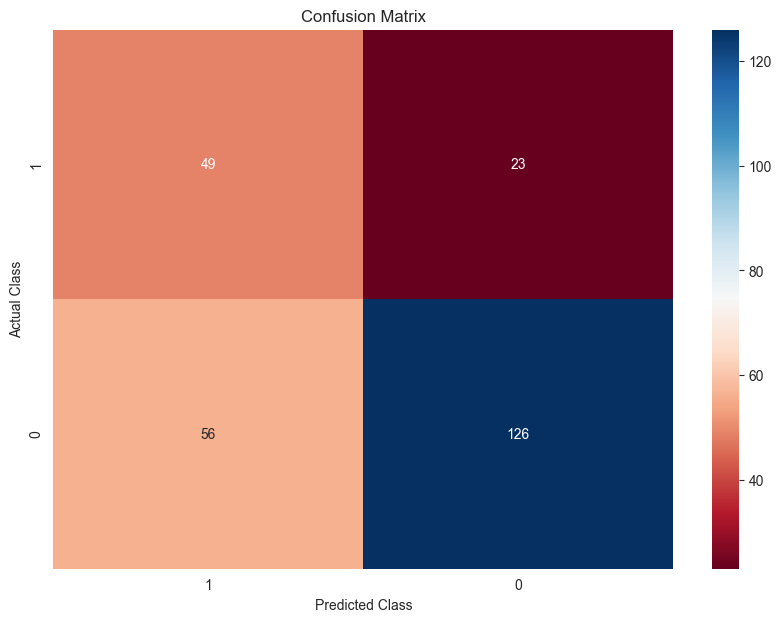

              precision    recall  f1-score   support

           0       0.85      0.69      0.76       182
           1       0.47      0.68      0.55        72

    accuracy                           0.69       254
   macro avg       0.66      0.69      0.66       254
weighted avg       0.74      0.69      0.70       254



In [19]:
predictions = model.predict(x_test[feature_selection['SVM']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['SVM']=classification_report(y_test, predictions)

print(classification_report(y_test, predictions))

### Mô hình LDA
    -Có kết quả đứng thứ hai, tập test được đánh giá có kết quả khả quan

In [20]:
supervied_features=x_train[feature_selection['LDA']]
supervied_target=y_train
model=LinearDiscriminantAnalysis()
model.fit(supervied_features,supervied_target)

LinearDiscriminantAnalysis()

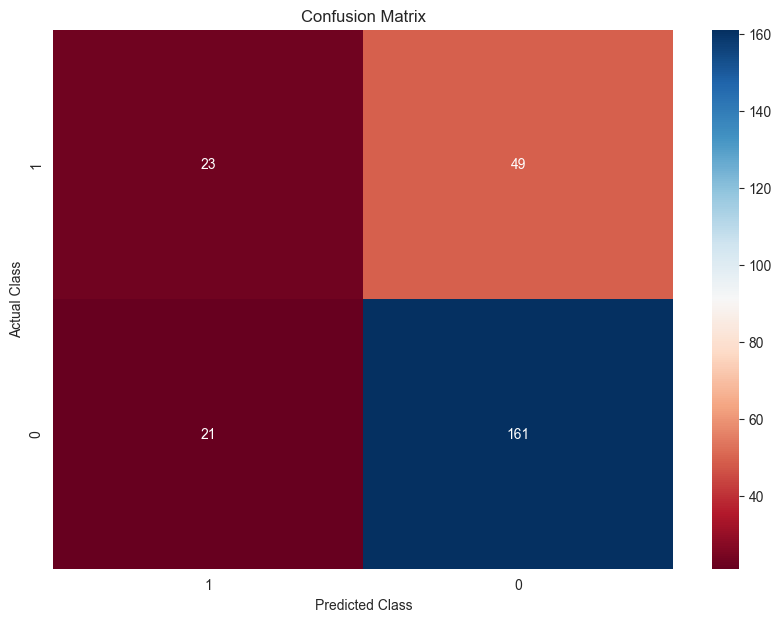

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       182
           1       0.52      0.32      0.40        72

    accuracy                           0.72       254
   macro avg       0.64      0.60      0.61       254
weighted avg       0.70      0.72      0.70       254



In [21]:
predictions = model.predict(x_test[feature_selection['LDA']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['LDA']=classification_report(y_test, predictions)

# Hiển thị báo cáo phân loại để xem thêm thông tin chi tiết
print(classification_report(y_test, predictions))

## 2 Mô hình đạt điểm cao nhất là:
    -RD: RandomForest
    -CART: DecisionTreeClassifer


### DecisionTreeClassifer

In [22]:
supervied_features=x_train[feature_selection['DTC']]
supervied_target=y_train
model=DecisionTreeClassifier(class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

DecisionTreeClassifier(class_weight={0: 0.6325301204819277,
                                     1: 2.3863636363636362})

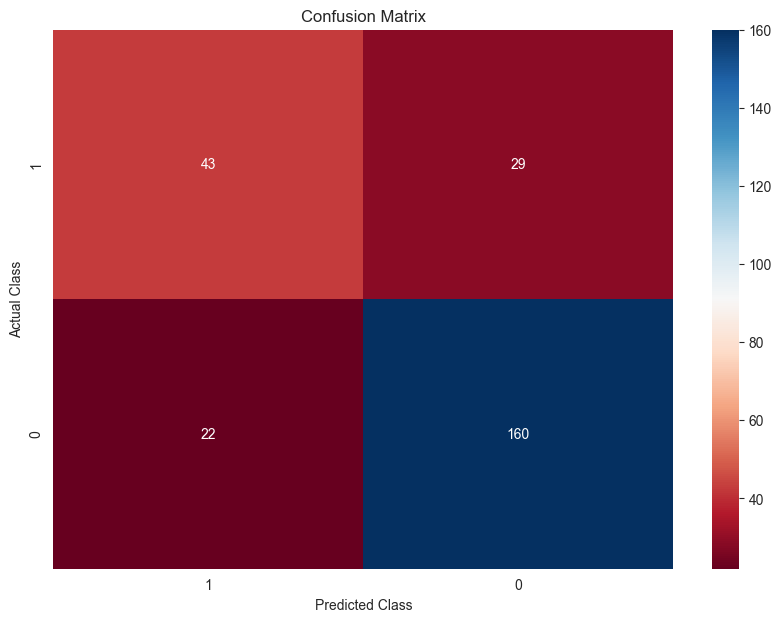

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       182
           1       0.66      0.60      0.63        72

    accuracy                           0.80       254
   macro avg       0.75      0.74      0.75       254
weighted avg       0.79      0.80      0.80       254



In [23]:
predictions = model.predict(x_test[feature_selection['DTC']])

conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['DecisionTreeClassifer']=classification_report(y_test, predictions)
print(classification_report(y_test, predictions))

### Mô hình Random Forest
    - Có dấu hiệu tích cực hơn SVM

In [24]:
supervied_features=x_train[feature_selection['RD']]
supervied_target=y_train
model=RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights_dict)
model.fit(supervied_features,supervied_target)

RandomForestClassifier(class_weight={0: 0.6325301204819277,
                                     1: 2.3863636363636362},
                       random_state=42)

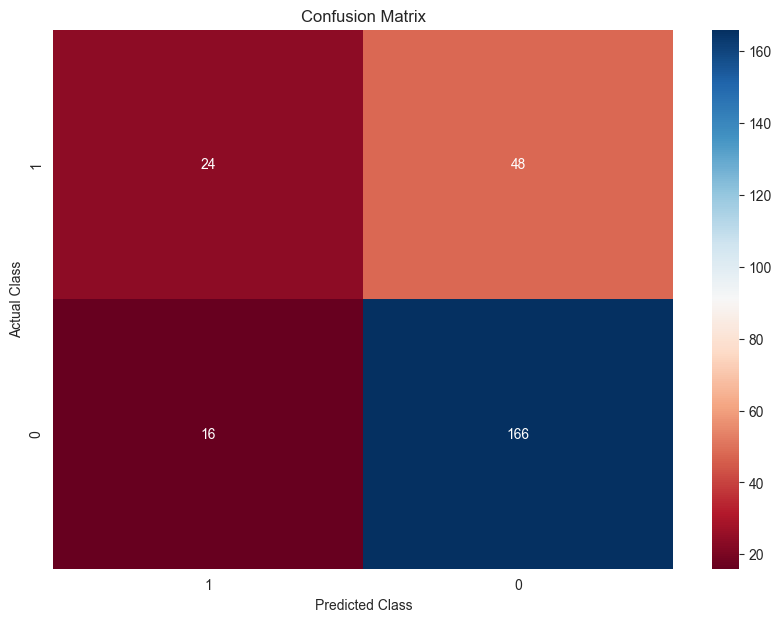

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       182
           1       0.60      0.33      0.43        72

    accuracy                           0.75       254
   macro avg       0.69      0.62      0.63       254
weighted avg       0.73      0.75      0.72       254



In [25]:
predictions = model.predict(x_test[feature_selection['RD']])

# Tạo ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, predictions,labels=[1,0])

# Vẽ heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=['1', '0'], yticklabels=['1', '0'],cmap='RdBu')
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()
evaluate_result['RD']=classification_report(y_test, predictions)

# Hiển thị báo cáo phân loại để xem thêm thông tin chi tiết
print(classification_report(y_test, predictions))

In [26]:
for x,y in evaluate_result.items():
    print(x)
    print(y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       182
           1       0.52      0.71      0.60        72

    accuracy                           0.73       254
   macro avg       0.69      0.72      0.70       254
weighted avg       0.77      0.73      0.74       254

GaussianNB
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       182
           1       0.49      0.44      0.47        72

    accuracy                           0.71       254
   macro avg       0.64      0.63      0.64       254
weighted avg       0.70      0.71      0.71       254

MultinomialNB
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       182
           1       0.33      0.06      0.10        72

    accuracy                           0.70       254
   macro avg       0.53      0.51      0.46       254
weighted avg       0.61      0

### Nhận xét dựa trên kết quả của tập Test
DecisionTreeClassifier: Mô hình này có độ chính xác cao nhất (80%) so với các mô hình khác. Precision và Recall của nó cũng khá cân đối (0.85 và 0.88 cho lớp 0, 0.66 và 0.60 cho lớp 1), cho thấy mô hình này có hiệu suất tốt trong việc phân loại cả hai lớp.

GradientBoostingClassifier: Mô hình này có độ chính xác thứ hai cao nhất (77%) và Precision cao (0.79 cho lớp 0 và 0.65 cho lớp 1). Tuy nhiên, Recall của lớp 1 khá thấp (0.39), cho thấy mô hình này có thể bỏ sót một số trường hợp gian lận.

Dựa trên các dữ liệu tập test ta thấy mô hình DecisionTreeClassifier  là lựa chọn tốt nhất cho bài toán dự đoán hồ sơ gian lận của bạn, do chúng có độ chính xác và Precision cao, cùng với Recall cân đối giữa hai lớp.

### Nhận xét kết quả từ tập test và tập train
Khi so sánh kết quả giữa tập test và tập train, ta thấy rằng các chỉ số đánh giá trên tập test có xu hướng thấp hơn. Điều này là bình thường vì mô hình thường hoạt động tốt hơn trên dữ liệu mà nó đã được huấn luyện. Tuy nhiên, nếu sự khác biệt giữa hiệu suất trên tập train và tập test quá lớn, điều này có thể là dấu hiệu của hiện tượng quá khớp (overfitting), tức mô hình hoạt động tốt trên tập train nhưng không tốt trên dữ liệu mới.

In [27]:
def check_result(prediction):
    if isinstance(prediction, (np.ndarray, pd.Series)):
        prediction = prediction.item()  # Hoặc sử dụng prediction[0] hoặc prediction.iloc[0]
    if prediction==1:
        return "Y"
    else:
        return "N"

In [28]:
def check_output(stt,model, X_test, Y_test):
    print(f"Lần thứ {stt}: ")
    indx = rd.randint(0, X_test.shape[0] - 1)  # Đảm bảo indx nằm trong giới hạn của DataFrame
    sample = X_test.iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(Y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        return True
    else: return False
    
    

In [29]:
n_check=10
solandung=0
for i in range(n_check):
    if check_output(i+1,model, x_test[feature_selection['RD']], y_test):
        solandung+=1


Lần thứ 1: 
True: Y
Predicted: Y
----------------------------
Lần thứ 2: 
True: Y
Predicted: N
----------------------------
Lần thứ 3: 
True: N
Predicted: N
----------------------------
Lần thứ 4: 
True: Y
Predicted: N
----------------------------
Lần thứ 5: 
True: Y
Predicted: N
----------------------------
Lần thứ 6: 
True: N
Predicted: N
----------------------------
Lần thứ 7: 
True: Y
Predicted: N
----------------------------
Lần thứ 8: 
True: Y
Predicted: N
----------------------------
Lần thứ 9: 
True: N
Predicted: Y
----------------------------
Lần thứ 10: 
True: N
Predicted: N
----------------------------


In [30]:
print(f"Số lần dự đoán đúng: {solandung} chiếm khoảng {(solandung/n_check)*100}% tổng lần dự đoán")

Số lần dự đoán đúng: 4 chiếm khoảng 40.0% tổng lần dự đoán


In [31]:
solandung=0
for indx in range(len(x_test)):
    sample = x_test[feature_selection['RD']].iloc[indx, :].values        # Chuyển DataFrame thành mảng NumPy
    sample = np.expand_dims(sample, axis=0)     # Mở rộng kích thước cho phù hợp với mô hình
    y_predict = model.predict(sample)
    Y_check = check_result(y_test.iloc[indx])
    print('True:', Y_check)
    print('Predicted:', check_result(y_predict))
    print("----------------------------")
    if Y_check==check_result(y_predict):
        solandung+=1
    


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: Y
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------


True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: Y
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: N
----------------------------
True: N
Predicted: Y
----------------------------
True: N
Predicted: N
----------------------------


In [32]:
print(f"Số lần dự đoán đúng trong lan kiểm tra: {solandung} chiếm khoảng {(solandung/len(x_test))*100}% tổng lần dự đoán")


Số lần dự đoán đúng trong lan kiểm tra: 190 chiếm khoảng 74.80314960629921% tổng lần dự đoán
